# Some important admin and homework for next time.


1. __Important point number 1__. We are reaching the mid-term of the semester and it is time for some reflection :) I want to know from you guys how the class is going. This is super important for me to make sure that the second half of the semester goes well. Before working on the material for today, please __fill [the mid-term survery ](https://docs.google.com/forms/d/e/1FAIpQLSc79NAmXoPfYjmVyVgCDUdyK8narAOuR-CmgYhQM6h3vRZfuA/viewform?usp=sf_link)__ on Google Forms. I promise it should not take more than 5 minutes. 


2. __Important point number 2__. We are slowly approaching the time when you guys will work on your own project. There are still a couple of classes to go, but by now you have a good idea of the methods and types of questions we work with in this class. And I would like to start discussing your ideas. Make sure you __complete Exercise 5 (at the end of this notebook) before next Wednesday__. We will take some time to talk about it next time. 


# Overview of today's class.

This week's curriculum is about text analysis. The overview is

* Tricks for raw text (NLPP Chapter 3) and finding the important words in a document (TF-IDF)
* Apply these tricks to study the content of submissions 

In the first part, we will take a quick tour of NLPP's chapter 3, which is boring, but an amazing resource that you'll keep returning to. Then we'll talk about how we can use simple statistics to get text to show us what it's all about. We will even do a little visualization. 


# Part 1 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

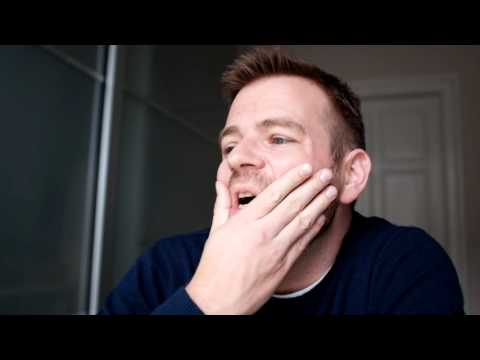

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).

> _Exercise_ 1: Just a couple of examples from the book: Work through the exercises NLPP 3.12: 6, 30.

In [8]:
import sys
#!{sys.executable} -m pip install nltk
import nltk, re, pprint
nltk.download()
from nltk import word_tokenize

nltk.re_show(r"\w+([-']\w+)*","[a-zA-Z]+") #\w+([-']\w+)*
nltk.re_show(r"\w+([-']\w+)*","[A-Z][a-z]*") # \w+([-']\w+)*
nltk.re_show("\w+|\S\w*","p[aeiou]{,2}t")

Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
[{a-zA-Z}]+
[{A-Z}][{a-z}]*
{p}{[aeiou}{]}{{}{,2}{}t}


In [16]:
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [22]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text_l = IndexedText(lancaster, grail)
text.concordance('lie')
print("------------------------------------------------------------------------------")
text_l.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t
------------------------------------------------------------------------------
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger 

### Prelude to part 2. -  Data.

In the follwing exercises, we will study the text contained in _r/wallstreebets_ submissions. To make things a bit more exciting, we will work with \**all** the submissions posted in 2020 in _r/wallstreebets_. As you may well guess, we will need both the title and the content of each submission.

To make things a bit less tedious for you guys, I downloaded and made avaialble the data you need (you can find it [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)). The dataset consists of all the submissions posted between January 1st and December 31st 2020 with content in English. For each submission, you have the following information: timestamp of creation (__created_utc__), __title__, textual content (__selftext__), and __score__. You are welcome to use this data. If you prefer to download your own (see optional exercise below), that's even better!! As usual, I do not expect you to find a perfect match between your data and mine. In the exercises below, I refer to this data as the "_wallstreetbets submissions dataset_".

_Exercise (Optional)_: 

> * Download all submissions posted on _r/wallstreetbets_ in 2020 using [psaw](https://pypi.org/project/psaw/).
> * For each submission, keep the title, the textual content, the score, the author, and the time of creation. 
> * Remove submissions whose content has been removed, and those that are not in English. You can use the library [langdetect](https://pypi.org/project/langdetect/) to detect the language of a given text.



# Part 2 - Words that characterize stocks discussed on r/wallstreetbets

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is Sune talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, we'll use a very simple weighting scheme called TF-IDF to find the words in the reddit r/wallstreetbets submissions that charachterize different stocks. In cleaning the Reddit submissions, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for the discussions around Gamestop, Microsoft, and Tesla). The wordclouds may not be immediately understandable. But if you do some research on the important words, you will find that the TF-IDF method extracts quite interesting information.

<img src="https://github.com/lalessan/comsocsci2021/blob/master/files/wordclouds.png?raw=true" alt="Drawing" style="width: 1000px;"/>


> **Video lecture**: Simple methods reveal a lot. Sune talks a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

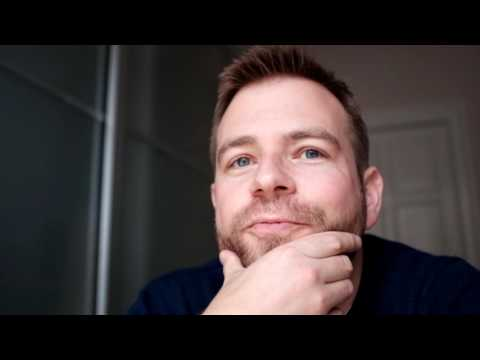

In [23]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

_Exercise 2: Most discussed stocks in r/wallstreebets_. GME is only one among many stocks people have discussed in _r/wallstreetbets_. In this exercise, we will find the most discussed stocks on _wallstreetbets_. Stocks are identified by their [Ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol). A Ticker symbol is nothing but a string consisting of letters and numbers, and is typically quite short. For example the Gamestop symbol is _GME_, Amazon is _AMZN_, Alphabet is _GOOGL_...

> 1. To talk about a specific stock, Redditors often use the corresponding ticker symbol [preceded by the dollar sign](https://www.reddit.com/r/wallstreetbets/comments/5yvvue/why_do_you_put_a_dollar_sign_in_front_of_a_ticker/) (\\$GME, \$AMZN...). Write down a [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression) matching words that begin with a dollar sign "\\$". See [NLPP book, section 3.4]().
> 2. Load the _wallstreetbets submission dataset_ as a Pandas DataFrame and create a new column containing both the title and the textual content of each submission (as one long string). We refer to this as the _text_ of the submission.
> 3. For each submission, find all ticker symbols (those preceded by a dollar sign) contained in the _text_. Use the function [re.findall](https://docs.python.org/3/library/re.html), and the regular expression you created in point 1). Some tips for success: 
> > * Remove matches that are definetly not stock symbols (for example amounts like: \\$100, \$1000k).
> > * Convert all matches to uppercase
> > * Remove the dollar sign at the beginning of the symbol (e.g. \\$gme → GME).
> 4. Create a list containing the top 15 Ticker Symbols by number of occurrences. GME should be among them. If it is not, check again your analysis and/or come talk to me. Google the top 15 symbols and find the corresponding company names. Are they known companies or not?

In [61]:
import pandas as pd
import nltk, re, pprint
from nltk import word_tokenize

#comments = pd.read_csv("Data/week1/gme_reddit_posts_comments.csv", parse_dates = ["creation_date"])
submissions = pd.read_csv("Data/week1/gme_reddit_posts.csv", parse_dates = ["creation_date"])

In [64]:
stocksort = r"^\$[a-zA-Z]+\d*"
tickers = [t.replace("$","").upper() for text in submissions.title for t in re.findall(stocksort, text)]

ticker_occ = nltk.FreqDist(tickers)
ticker_occ.most_common()

[('GME', 563),
 ('BB', 25),
 ('AMC', 11),
 ('PLTR', 7),
 ('EXPR', 5),
 ('FUBO', 4),
 ('SPCE', 4),
 ('TR', 3),
 ('F', 3),
 ('NOK', 3),
 ('BBBY', 3),
 ('CCIV', 2),
 ('TSLA', 2),
 ('CRSR', 2),
 ('NNDM', 2),
 ('SPY', 2),
 ('LGND', 1),
 ('PRPL', 1),
 ('ZIOP', 1),
 ('MKD', 1),
 ('CRNT', 1),
 ('GM', 1),
 ('OSTK', 1),
 ('BABA', 1),
 ('NIO', 1),
 ('LGIH', 1),
 ('DM', 1),
 ('A', 1),
 ('BLOCKBUSTER', 1),
 ('ENG', 1),
 ('LULU', 1),
 ('SRNE', 1),
 ('TXMD', 1),
 ('MT', 1),
 ('BTWN', 1),
 ('SAM', 1),
 ('MAC', 1),
 ('NVDA', 1),
 ('TRIT', 1),
 ('SHITFIX', 1),
 ('VSPR', 1),
 ('RIDE', 1),
 ('HORTING', 1),
 ('ATVI', 1)]

_Exercise 3: TF-IDF and the stocks discussed on r/wallstreetbets._ The goal for this exercise is to find the words charachterizing each of the stocks discussed on r/wallstreetbets. We will focus on the top 15 stocks we idenfied in Exercise 2, and we will of course use TF-IDF.

 
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>>   * It Stands for Term Frequency. How often does a term occur in a text or corpus.
>   * What does IDF stand for?
    >> * Inverse Document Frequency. To deminish the weight of words like "the" since this word does not tell us much about the text, but appears alot. 
>
> 2. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. **The advice to go back and check Chapter 3 is valid for every cleaning step below**.
>   * Exclude punctuation.
>   * Exclude URLs
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * **Note** that none of the above has to be perfect. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some submissions repeat certain words again and again and again, whereas other are very short. For that reason, I decided to use the unique set of words from each submission rather than each word in proportion to how it's actually used. Choices like that are up to you.
>
> 3. Find submissions discussing at least one of the top 15 stocks you identified above. To do so: 
> > * Create a function that finds the intersection between a list of tokens and your list of top 15 stocks. For example, your function applied to the tokens: _"[Here, TSLA, submission, GME]"_ should return ["TSLA","GME"]. (_Optional_: you can also try to included cases in which the list of tokens contains a company name among your top 15. For example the function applied to _"[Here, Gamestop, submission]"_ could return ['GME'].)
> > * Create a new column _stock_ in your DataFrame, containing the output of your function applied to the _text_ column. Values in this column should be lists. 
> > * Handle cases where one post discusses more than one stock by applying the function [__explode__](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) to the _stock_ column. This will duplicate submissions associated to multiple stocks. After exploding, the values included in the _stock_ column should be strings. 
> > * Handle cases where none of the selected stocks is discussed by replacing Nan values, for example with "Other".
>
> 4. Now, we want to find out which words are important for each *stock*, so we're going to create several ***large documents, one for each stock***. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.
> 5. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within __5 stocks of your choice__. 
>   * Describe similarities and differences between the stocks.
>   * Why aren't the TFs not necessarily a good description of the stocks?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> 6. We're ready to calculate TF-IDF. Do that for the __5 stock of your choice__. 
>   * List the 10 top TF words for each stock.
>  * List the 10 top TF-IDF words for each stock.
>   * Are these 10 words more descriptive of the stock? If yes, what is it about IDF that makes the words more informative?

In [65]:
from tqdm import tqdm
#Defining Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
i = 0
#Initialising the tokens list which will become our column
token_list = []

#creating the tokens column without all the preconditions such as URL, punctuation and lower case letters.
for text in tqdm(submissions.title):
    text = [w for w in text.split(" ") if not re.search(r'[/ \\]',w)]
    
    tokens = [token.lower() for token in word_tokenize(" ".join(text))
             if not token.lower() in stop_words and token.isalpha() and token.isascii()]
    token_list.append(tokens)
#Adding the tokens to the dataframe
submissions['tokens'] = token_list


100%|██████████████████████████████████████████████████████████████████████████| 15014/15014 [00:05<00:00, 2778.23it/s]


In [66]:
submissions
#Defining the commonstocks
common_Stocks = [word[0] for word in ticker_occ.most_common(15)]
stocks_list = []
i = 0
for tokens in tqdm(submissions.tokens):
    #Finding all the stocks in the tokens column
    stocks = [token.upper() for token in submissions['tokens'][i]
             if token.upper() in common_Stocks]
    #Handling cases with no mention of stocks
    if not stocks:
        stocks = ['Other']
    stocks_list.append(stocks)
    i+=1
#Adding the stocks to the dataframe
submissions['stocks'] = stocks_list

100%|█████████████████████████████████████████████████████████████████████████| 15014/15014 [00:00<00:00, 58815.00it/s]


In [67]:
#Expldoing the stocks 
submissions = submissions.explode('stocks')
submissions['stocks'] = submissions['stocks'].apply(str)
submissions = submissions.reset_index(drop=True)


In [68]:
submissions

title      id  score  \
0             I am finally buying GME &amp; BB tomorrow.  l49xif      1   
1             I am finally buying GME &amp; BB tomorrow.  l49xif      1   
2           Something that will help you autists in GME.  l49x88      1   
3      Holy shit you guys https://hard-money.net/cath...  l49we9      1   
4      New member here. WHERE THE FUCK DO I BUY SOME ...  l49ve6      1   
...                                                  ...     ...    ...   
16906                                       Die $GME die  eoafl3      1   
16907                 Gamestop and Ford. This is the way  emdmfg      1   
16908                           GME. You know what to do  ekomox      1   
16909  I got 500€ on DEGIRO where do you advice to YO...  ej0jf0      1   
16910               GME YOLO month-end update — Dec 2019  eick65      1   

       created_utc creation_date            author  num_comments  \
0       1611529173    2021-01-24     mricecream429             1   
1       1611529173    2021-01-24     mricecream429             1   
2       1611529149    2021-01-24         SethEllis             0   
3       1611529073    2021-01-24          steeej92             0   
4       1611528981    2021-01-24            krasaa             1   
...            ...           ...               ...           ...   
16906   1578949932    2020-01-13       Rang_Dipkin             1   
16907   1578594078    2020-01-09        callmetmrw             7   
16908   1578284023    2020-01-06   -deepwatervalue             0   
16909   1577983305    2020-01-02       CIARRAPUNGI            21   
16910   1577844808    2020-01-01  DeepFuckingValue            52   

                                          tokens stocks  
0      [finally, buying, gme, amp, bb, tomorrow]    GME  
1      [finally, buying, gme, amp, bb, tomorrow]     BB  
2                [something, help, autists, gme]    GME  
3                             [holy, shit, guys]  Other  
4           [new, member, fuck, buy, quick, gme]    GME  
...                                          ...    ...  
16906                            [die, gme, die]    GME  
16907                      [gamestop, ford, way]  Other  
16908                                [gme, know]    GME  
16909                [got, degiro, advice, yolo]  Other  
16910                   [gme, yolo, update, dec]    GME  

[16911 rows x 9 columns]

In [69]:
#update Documents
import os.path

for i in tqdm(range(len(submissions["stocks"]))):
    temp_stock = submissions["stocks"][i]
    if temp_stock == "Other":
        continue
    if os.path.isfile(str("Data/week6/" + temp_stock)):
        f = open(str("Data/week6/" + temp_stock),"a")
    else:
        f = open(str("Data/week6/" + temp_stock),"w+")
    #f = open(str("Data/week6/" + temp_stock),"w+")
    for j in range(len(submissions["tokens"][i])):
        f.write(str(submissions["tokens"][i][j])+ " ")
    f.write("\n")
    f.close()

100%|███████████████████████████████████████████████████████████████████████████| 16911/16911 [00:17<00:00, 977.62it/s]


In [75]:
# The most frequent words:
from collections import Counter
import numpy as np
#opens the file. the with statement here will automatically close it afterwards.
def TF(stocks):
    counts = Counter()
    for i in range(len(stocks)):
        with open("Data/week6/" + stocks[i]) as input_file:
            #build a counter from each word in the file
            count = Counter(word for line in input_file
                                 for word in line.split())
            counts += count
    return counts.most_common()

def IDF(stocks):
    N = len(stocks)
    unique = []
    for i in tqdm(range(len(stocks))):
        with open("Data/week6/" + stocks[i]) as input_file:
            #build a counter from each word in the file
            count = Counter(word for line in input_file
                                 for word in line.split())
            for j in range(len(count.most_common())):
                unique.append(count.most_common()[j][0])
    common = Counter(unique).most_common()
    results = []
    for i in range(len(common)):
        temp_idf = np.log(N/(1+abs(int(common[i][1])))) + 1
        results.append((common[i][0], temp_idf))
    return results

my_stocks = ["GME", "EXPR", "BB", "TSLA", "AMC"] 

our_TFs = TF(my_stocks)
our_IDFs = IDF(my_stocks)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.13s/it]


In [71]:
my_stocks = ["GME", "EXPR", "BB", "TSLA", "AMC"]
#Printing the top 10 Term Frequency for each stock
for i in range(len(my_stocks)):
    print("Top 10 Term Frequency for " + my_stocks[i] + " is: ")
    print(TF([my_stocks[i]])[0:10])
    
#     print("Top 10 Inverse Document Frequency for " + my_stocks[i] + " is: ")
#     print(IDF([my_stocks[i]])[0:10])

Top 10 Term Frequency for GME is: 
[('gme', 32266), ('bb', 2398), ('pltr', 1796), ('short', 1734), ('buy', 1678), ('moon', 1675), ('shares', 1640), ('squeeze', 1486), ('gang', 1343), ('next', 1147)]
Top 10 Term Frequency for EXPR is: 
[('expr', 75), ('gme', 71), ('next', 35), ('new', 16), ('express', 11), ('let', 9), ('run', 9), ('big', 9), ('stock', 9), ('price', 9)]
Top 10 Term Frequency for BB is: 
[('bb', 2670), ('gme', 2398), ('pltr', 609), ('moon', 276), ('next', 214), ('buy', 166), ('wsb', 158), ('going', 143), ('amp', 140), ('short', 133)]
Top 10 Term Frequency for TSLA is: 
[('tsla', 455), ('gme', 438), ('pltr', 236), ('nio', 70), ('next', 50), ('bb', 41), ('amp', 37), ('us', 32), ('yolo', 31), ('buy', 31)]
Top 10 Term Frequency for AMC is: 
[('amc', 407), ('gme', 353), ('next', 152), ('bb', 114), ('squeeze', 79), ('short', 68), ('pltr', 43), ('moon', 31), ('buy', 30), ('go', 23)]


In [112]:
IDF_sorted = sorted(our_IDFs, key=lambda x : x[0])
df = pd.DataFrame()

def TFIDF(stock):
    TF_temp = TF([stock])
    TF_temp = sorted(TF_temp, key=lambda x : x[0])
    IDF_temp = []
    results = []
    for i in range(len(IDF_sorted)):
        if IDF_sorted[i][0] in [item for t in TF_temp for item in t]:
            IDF_temp.append(IDF_sorted[i])

    for i in range(len(TF_temp)):
            temp_tfidf = TF_temp[i][1] * IDF_temp[i][1]
            results.append((TF_temp[i][0], temp_tfidf))

    return sorted(results, key=lambda x : x[1])

for i in tqdm(range(len(my_stocks))):
    df[my_stocks[i] + "_TF"] = TF([my_stocks[i]])[0:10]
    df[my_stocks[i] + "_IDF"] = TFIDF(my_stocks[i])[0:10]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.03s/it]


In [113]:
df

GME_TF                         GME_IDF        EXPR_TF  \
0     (gme, 32266)    (causes, 3.0216512475319814)     (expr, 75)   
1       (bb, 2398)      (city, 3.0216512475319814)      (gme, 71)   
2     (pltr, 1796)    (fucker, 3.0216512475319814)     (next, 35)   
3    (short, 1734)   (monitor, 3.0216512475319814)      (new, 16)   
4      (buy, 1678)  (moooooon, 3.0216512475319814)  (express, 11)   
5     (moon, 1675)       (non, 3.0216512475319814)       (let, 9)   
6   (shares, 1640)   (praying, 3.0216512475319814)       (run, 9)   
7  (squeeze, 1486)    (shills, 3.0216512475319814)       (big, 9)   
8     (gang, 1343)      (sins, 3.0216512475319814)     (stock, 9)   
9     (next, 1147)   (solider, 3.0216512475319814)     (price, 9)   

                        EXPR_IDF         BB_TF  \
0     (play, 1.6353568864120909)    (bb, 2670)   
1    (think, 1.6353568864120909)   (gme, 2398)   
2                     (way, 2.0)   (pltr, 609)   
3    (seems, 2.4462871026284194)   (moon, 276)   
4       (get, 2.453035329618136)   (next, 214)   
5       (one, 2.453035329618136)    (buy, 166)   
6    (shorts, 2.453035329618136)    (wsb, 158)   
7     (since, 2.453035329618136)  (going, 143)   
8  (thoughts, 2.453035329618136)    (amp, 140)   
9   (twitter, 2.453035329618136)  (short, 133)   

                              BB_IDF      TSLA_TF  \
0         (aapl, 2.4462871026284194)  (tsla, 455)   
1      (pumping, 2.4462871026284194)   (gme, 438)   
2      (gamestop, 2.453035329618136)  (pltr, 236)   
3                       (close, 3.0)    (nio, 70)   
4                          (gt, 3.0)   (next, 50)   
5                     (mission, 3.0)     (bb, 41)   
6  (battlefield, 3.0216512475319814)    (amp, 37)   
7       (behind, 3.0216512475319814)     (us, 32)   
8          (bot, 3.0216512475319814)   (yolo, 31)   
9         (bots, 3.0216512475319814)    (buy, 31)   

                         TSLA_IDF         AMC_TF  \
0  (gamestop, 1.6353568864120909)     (amc, 407)   
1                    (close, 2.0)     (gme, 353)   
2                    (daily, 2.0)    (next, 152)   
3                  (fucking, 2.0)      (bb, 114)   
4                     (need, 2.0)  (squeeze, 79)   
5  (earnings, 2.4462871026284194)    (short, 68)   
6   (forever, 2.4462871026284194)     (pltr, 43)   
7      (help, 2.4462871026284194)     (moon, 31)   
8      (keep, 2.4462871026284194)      (buy, 30)   
9      (part, 2.4462871026284194)       (go, 23)   

                             AMC_IDF  
0                      (bought, 2.0)  
1                        (hype, 2.0)  
2                         (put, 2.0)  
3                     (selling, 2.0)  
4                        (tell, 2.0)  
5                        (went, 2.0)  
6        (ahead, 2.4462871026284194)  
7       (bagger, 2.4462871026284194)  
8      (blowing, 2.4462871026284194)  
9  (degenerates, 2.4462871026284194)

 _Exercise 4: The Wordcloud_. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each stock. Feel free to make it as fancy or non-fancy as you like. 
> * Comment on the results. Are these words to be expected? Is there anything that is surprising? 

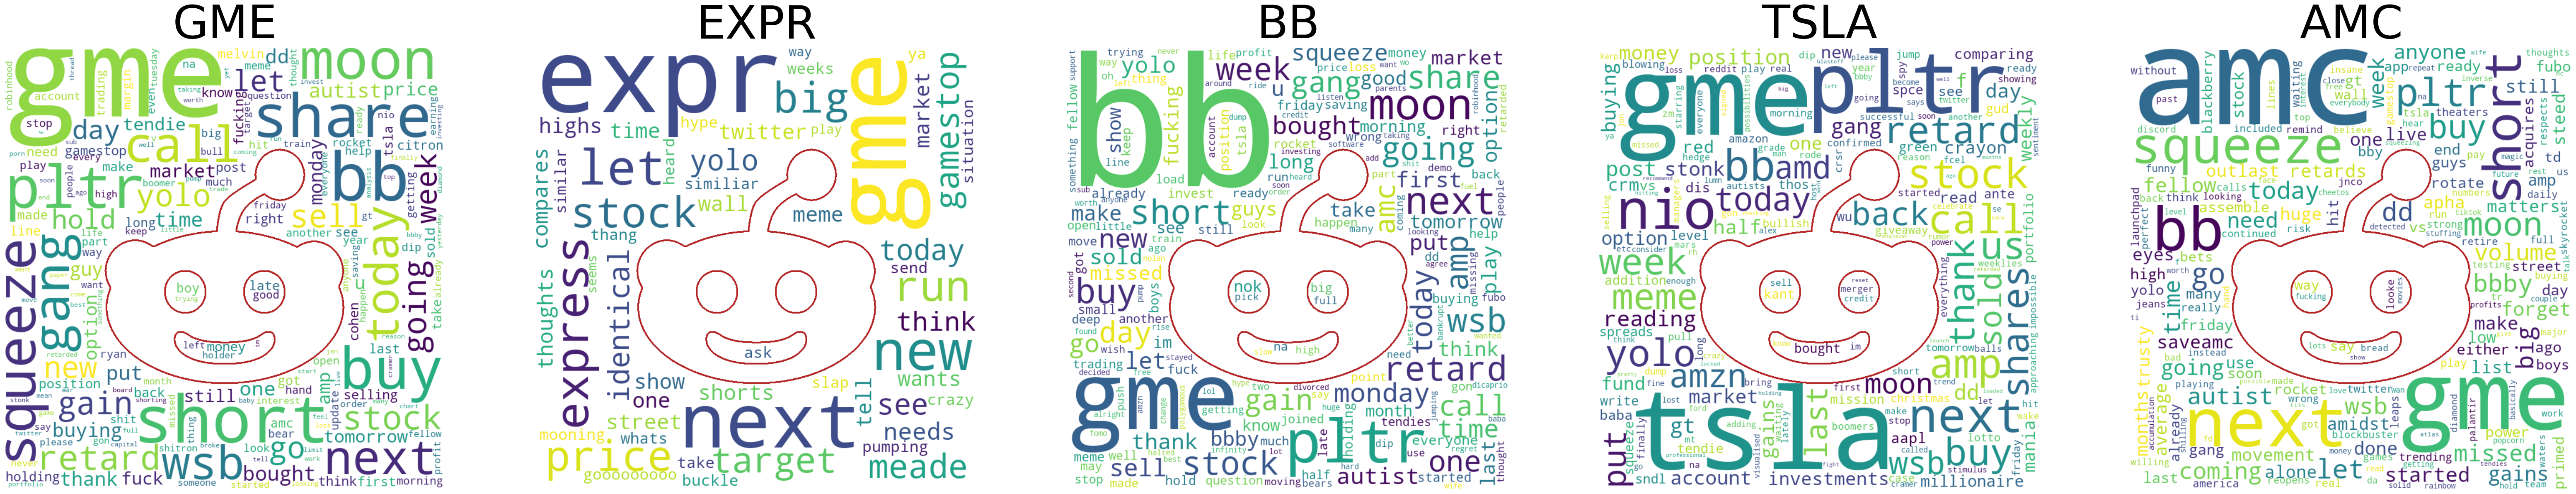

In [72]:
import sys
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#!{sys.executable} -m pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#Mask - Found a funny reddit image because it looks dope
reddit_mask = np.array(Image.open("Reddit2.png"))

my_stocks = ["GME", "EXPR", "BB", "TSLA", "AMC"] 
#Define figure presets
fig = plt.figure(num=None, figsize=(100,50), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(my_stocks)):
    #Reading one document at a time
    text =open ("Data/week6/" + my_stocks[i]).read()
    ax = fig.add_subplot(1, 5, i + 1)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=500, max_words=200, collocations = False, background_color="white",
                          contour_width=3, contour_color='firebrick', mask=reddit_mask).generate(text)
    # Display the generated image:
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(my_stocks[i], fontsize=100)

plt.show()

_Exercise 5: A Study Project in Computational Social Science._
> 1. Read the [Project Assignment](https://github.com/lalessan/comsocsci2021/wiki/Project-Assignment) page, where I explain how to set up a Study Project.
> 2. Think of a topic of interest to your would like to study using data downloaded from the Web (Wikipedia, Twitter, Reddit, Facebook, Github, other data sources...), and some of the methods we have seen in this course. 
> 3. What is the topic? 
> 4. What is the data? 
> 5. Write down 3 research questions related to your topic that you would like to investigate.
> 6. Put together 1 slide including the answers to points 3,4,5.

__Important__: This will be by no means the final choice for your Project Assignment. All I want is for you guys to start thinking about it.